<a href="https://colab.research.google.com/github/7sr7/Projs-in-AI-HW-4/blob/main/Silvestre_Projs_in_AI_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silvestre Ronin

Professor Mushtaque

PROJECTS IN AI & MACHINE LRNG - CSCI 4170 - 01

2025 07 10

TASK1 START

The following link is the dataset I have chosen:
https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

The reason this dataset was chosen was because it is sentiment analysis on social media posts. We need RNNs to solve this because the data is sequential, since order of the sentence may change the sentiment behind it. (expand on this...)

In [95]:
# importing required libraries...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel
from wordcloud import WordCloud
from collections import Counter


import time
import warnings
warnings.filterwarnings("ignore")

In [96]:
# mounting to google drive...
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# reading data sets...
trainingData = pd.read_csv('/content/drive/MyDrive/twitter_training.csv')
validationData = pd.read_csv('/content/drive/MyDrive/twitter_validation.csv')

In [98]:
# viewing the first few rows of the data...
trainingData.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [99]:
# determining data size....
trainingData.shape

(74681, 4)

In [100]:
# validation data is very small... lets do train test split on the training data itself, so we have sufficient test data size...
# (still need to preprocess validation data in the same ways)...
validationData.shape

(999, 4)

In [101]:
# checking missing values...
trainingData.isna().sum()

,0
2401,0
Borderlands,0
Positive,0
"im getting on borderlands and i will murder you all ,",686


In [102]:
# printing all the rows that have missing sentences...
nullRows = trainingData[trainingData.isnull().any(axis=1)]
print(nullRows)

       2401  Borderlands  Positive  \
60     2411  Borderlands   Neutral   
552    2496  Borderlands   Neutral   
588    2503  Borderlands   Neutral   
744    2532  Borderlands  Positive   
1104   2595  Borderlands  Positive   
...     ...          ...       ...   
73971  9073       Nvidia  Positive   
73972  9073       Nvidia  Positive   
74420  9154       Nvidia  Positive   
74421  9154       Nvidia  Positive   
74422  9154       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
60                                                   NaN     
552                                                  NaN     
588                                                  NaN     
744                                                  NaN     
1104                                                 NaN     
...                                                  ...     
73971                                                NaN     
73972                                          

In [103]:
# it does not make sense to keep these rows since you cant perform sentiment analysis on an empty sentence so drop them entirely...

trainingData = trainingData.dropna(subset=["im getting on borderlands and i will murder you all ,"])
trainingData = trainingData.reset_index(drop=True)

print(trainingData.shape)
trainingData.isna().sum()

(73995, 4)


,0
2401,0
Borderlands,0
Positive,0
"im getting on borderlands and i will murder you all ,",0


In [104]:
validationData.isna().sum()

,0
3364,0
Facebook,0
Irrelevant,0
"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",0


In [105]:
# general information about the dataset...
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73995 entries, 0 to 73994
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   73995 non-null  int64 
 1   Borderlands                                            73995 non-null  object
 2   Positive                                               73995 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [106]:
# statistics of the dataset (numeric columns)...
trainingData.describe()

,2401
count,73995.000000
mean,6430.333685
std,3737.655932
min,1.000000
25%,3194.000000
50%,6418.000000
75%,9595.000000
max,13200.000000


In [107]:
# which columns have a missing value...?
trainingData.isnull().any(axis=0)

,0
2401,False
Borderlands,False
Positive,False
"im getting on borderlands and i will murder you all ,",False


In [108]:
validationData.isnull().any(axis=0)

,0
3364,False
Facebook,False
Irrelevant,False
"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",False


In [109]:
# this shows me how each column is correlated to the other ones.

# i only have one column that is int, so it does not make sense to run VIF to see
# multicollinearity since it relies on numeric features.
# for this same reason, we cannot do visualization via heatmap or pairplot...
dataNum = trainingData.select_dtypes(include='number')
dataNum.corr()

,2401
2401,1.0


In [110]:
# we are working more with string data so checking for token overlap is more beneficial...
duplicates = trainingData[trainingData.duplicated(subset=["im getting on borderlands and i will murder you all ,"], keep=False)]
print("Duplicates:\n", duplicates)

# counting...
print("Unique texts:", trainingData["im getting on borderlands and i will murder you all ,"].nunique())
print("Total rows:", len(trainingData))

Duplicates:
        2401  Borderlands  Positive  \
10     2402  Borderlands  Positive   
17     2404  Borderlands  Positive   
19     2404  Borderlands  Positive   
24     2405  Borderlands  Negative   
25     2405  Borderlands  Negative   
...     ...          ...       ...   
73929  9190       Nvidia  Positive   
73932  9190       Nvidia  Positive   
73934  9190       Nvidia  Positive   
73948  9193       Nvidia  Positive   
73949  9193       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
10                                                   was     
17     that was the first borderlands session in a lo...     
19     that was the first borderlands session in a lo...     
24     The biggest disappointment of my life came a y...     
25     The biggest disappointment of my life came a y...     
...                                                  ...     
73929  This news about the Nvidia 3000 series is ligi...     
73932  This news about the Nvidia 

In [111]:
# the number of unique rows is less than the number of total rows, so we know that there exists some duplicates
# it is best to drop one of these duplicate rows so that model is not "memorizing"...
trainingData = trainingData.drop_duplicates(
    subset=["im getting on borderlands and i will murder you all ,"],
    keep="first"
).reset_index(drop=True)

trainingData.shape

(69490, 4)

In [112]:
# now for validation data set...

# we are working more with string data so checking for token overlap is more beneficial...
duplicates = validationData[validationData.duplicated(subset=["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"], keep=False)]
print("Duplicates:\n", duplicates)

# counting...
print("Unique texts:", validationData["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"].nunique())
print("Total rows:", len(validationData))

Duplicates:
      3364  Facebook Irrelevant  \
217  3263  Facebook   Positive   
962  4050     CS-GO   Positive   

    I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
217                                                Wow                                                                                                                                                                                                  
962                                                Wow                                                                                                                                                                                                  
Unique texts: 998
Total rows: 999


In [113]:
# the number of unique rows is less than the number of total rows, so we know that there exists some duplicates
# it is best to drop one of these duplicate rows so that model is not "memorizing"...
validationData = validationData.drop_duplicates(
    subset=["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"],
    keep="first"
).reset_index(drop=True)

validationData.shape

(998, 4)

In [114]:
# seeing the actual breakdown of classification possible...
print(trainingData["Positive"].value_counts())

Positive
Negative      21166
Positive      19066
Neutral       17042
Irrelevant    12216
Name: count, dtype: int64


In [115]:
# keeping only positive and negative classifications since i want my sentiment analysis to be binary classification
# given how big the dataset is, i am comfortable doing this, since there are still many data observations to train the RNN on...
trainingData = trainingData[trainingData["Positive"].isin(["Positive", "Negative"])].copy()

# map to binary output...
trainingData["binOut"] = trainingData["Positive"].map({"Positive": 1, "Negative": 0})

print(trainingData["binOut"].value_counts())
print("\n")
print(trainingData["binOut"].value_counts(normalize=True) * 100)

binOut
0    21166
1    19066
Name: count, dtype: int64


binOut
0    52.609863
1    47.390137
Name: proportion, dtype: float64


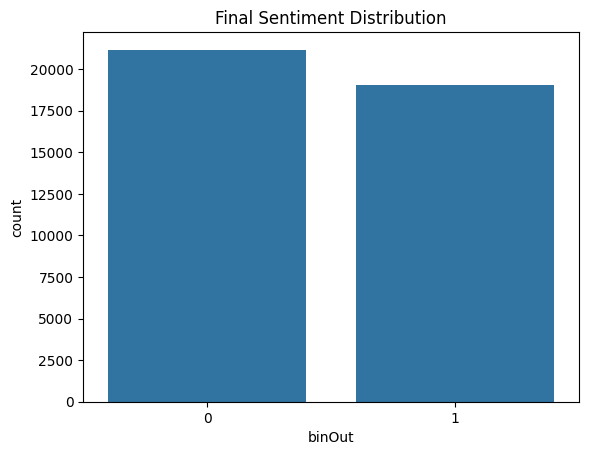

In [116]:
# visually showing that our labels are pretty evenly split, which is good since the data is not unbalanced...
sns.countplot(x="binOut", data=trainingData)
plt.title("Final Sentiment Distribution")
plt.show()

In [117]:
# now for validation...

# keeping only positive and negative classifications since i want my sentiment analysis to be binary classification
# given how big the dataset is, i am comfortable doing this, since there are still many data observations to train the RNN on...
validationData = validationData[validationData["Irrelevant"].isin(["Positive", "Negative"])].copy()

# map to binary output...
validationData["binOut"] = validationData["Irrelevant"].map({"Positive": 1, "Negative": 0})

print(validationData["binOut"].value_counts())
print("\n")
print(validationData["binOut"].value_counts(normalize=True) * 100)

binOut
1    276
0    266
Name: count, dtype: int64


binOut
1    50.922509
0    49.077491
Name: proportion, dtype: float64


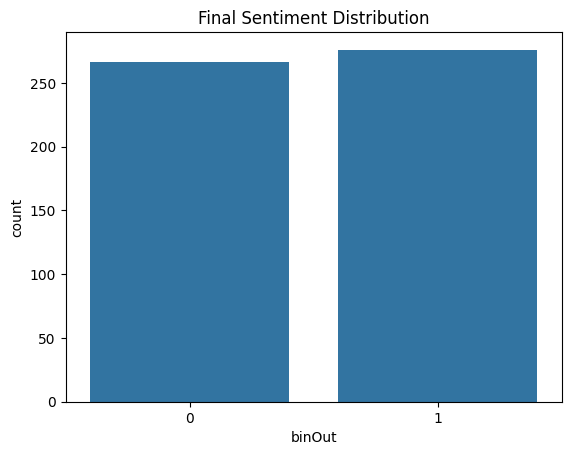

In [118]:
# visually showing that our labels are pretty evenly split, which is good since the data is not unbalanced...
sns.countplot(x="binOut", data=validationData)
plt.title("Final Sentiment Distribution")
plt.show()

count    40232.000000
mean       108.502784
std         79.201306
min          1.000000
25%         46.000000
50%         88.000000
75%        153.000000
max        727.000000
Name: textLen, dtype: float64


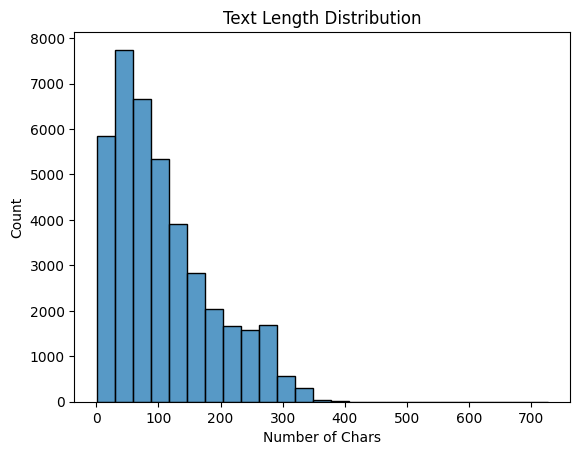

In [119]:
# visualizing how long the actual input sentences are, which we observe is roughly 50 characters on average...
trainingData["textLen"] = trainingData["im getting on borderlands and i will murder you all ,"].apply(len)

# summary...
print(trainingData["textLen"].describe())

# plotting...
sns.histplot(trainingData["textLen"], bins=25)
plt.title("Text Length Distribution")
plt.xlabel("Number of Chars")
plt.show()

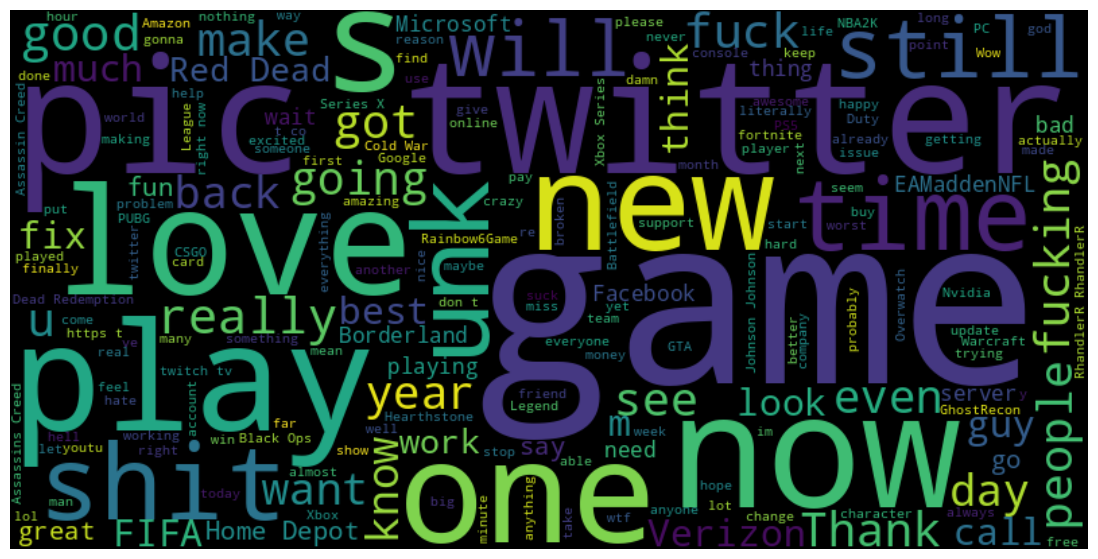

In [120]:
# creating a word cloud from the entire sentences...
allWords = " ".join(trainingData["im getting on borderlands and i will murder you all ,"])
wordcloud = WordCloud(width=800, height=400).generate(allWords)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [121]:
# finding the most common words from the entire sentences...
allWords = " ".join(trainingData["im getting on borderlands and i will murder you all ,"]).split()
print(Counter(allWords).most_common(20))

[('the', 21931), ('I', 16312), ('to', 15664), ('and', 14164), ('a', 12260), ('is', 10180), ('of', 10077), ('for', 8067), ('in', 7771), ('@', 6954), ('this', 6386), ('my', 6289), ('it', 6081), ('on', 5984), ('you', 5402), ('that', 5199), ('with', 4679), ('/', 4607), ('game', 4339), ('.', 3909)]


In [122]:
# train test splitting...
train, test = train_test_split(trainingData, test_size=0.15, random_state=42)

print(f"train size: {len(train)}\nvalidation size: {len(validationData)}\ntest size: {len(test)}")

train size: 34197
validation size: 542
test size: 6035


1.1...

In [125]:
# class initialization...

class myRNN(nn.Module):
  def __init__(self, inputSize, hiddenSize, numLayers):
    super(myRNN, self).__init__()
    self.hiddenSize = hiddenSize
    self.numLayers = numLayers

    # change this to be GRU, LSTM and rerun...
    self.rnn = nn.RNN(inputSize, hiddenSize, numLayers, batch_first=True)
    self.fc = nn.Linear(hiddenSize, 1)


  def forward(self, x):
    h0 = torch.zeros(self.numLayers, x.size(0), self.hiddenSize)

    out, _ = self.rnn(x, h0)

    out = out[:, -1, :]
    out = self.fc(out)

    return out

In [126]:
# model initialization...

inputSize = 10
hiddenSize = 10
numLayers = 2
learningRate = 0.001
maxItrs = 1000

model = myRNN(inputSize, hiddenSize, numLayers)

# loss and optimizer...
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), learningRate)

In [ ]:
# training the model...

for i in range(maxItrs):
  # reshape...

  # forward pass...
  outputs = model()
  loss = criterion(outputs, labels)

  # backward pass...
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (i+1) % 100 == 0:
    print(f"iteration: {i+1}, loss: {loss.item():.4f}")


In [ ]:
# testing the model...

with torch.no_grad():
  numCorrect = 0
  numSamples = 0

  # reshape...

  outputs = model()

  numSamples += labels.shape[0]
  numCorrect =